In [44]:
import tensorflow as tf
from tensorflow import keras

# helper
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

import pandas as pd
import datetime

import geopandas 
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon

import warnings
warnings.filterwarnings('ignore')


1.14.0


In [2]:
df = pd.read_csv("..\data\Parking_Citations_After_July_1_2015.csv", low_memory=False)
df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,4361370075,2019/09/17 12:00:00 AM,817.0,NaN,NaN,LA,NaN,MERC,PA,RD,1324 84TH PL W,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.471017e+06,1.808559e+06
1,4361370064,2019/09/17 12:00:00 AM,811.0,VM48,NaN,CA,NaN,BUIC,PA,GN,1000 85TH ST W,00551,55.0,88.13B+,METER EXP.,63,6.473192e+06,1.808298e+06
2,4361370053,2019/09/17 12:00:00 AM,809.0,NaN,NaN,CA,NaN,TOYT,PA,GY,1000 85TH ST W,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.473192e+06,1.808298e+06
3,4361370042,2019/09/17 12:00:00 AM,805.0,NaN,NaN,CA,NaN,NISS,PA,BK,8021 VERMONT AVE,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.473164e+06,1.810388e+06
4,4361370031,2019/09/17 12:00:00 AM,727.0,NaN,NaN,CA,NaN,HOND,PA,GY,1473 45TH ST W,00551,55.0,22500E,BLOCKING DRIVEWAY,68,6.469917e+06,1.823537e+06


In [5]:
zip_df = pd.read_pickle('zip_df.pkl')

In [6]:
zip_df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,VIN,Make,Body Style,Color,...,OBJECTID_1,OBJECTID,FID_1,Name,SDE_STATE_,ORIG_FID,Distance,Zip_Num,Shape_area,Shape_len
0,4361370075,2019/09/17 12:00:00 AM,817.0,NaN,NaN,LA,NaN,MERC,PA,RD,...,1164,106,250,90044,655821.0,8540,0.0,90044,1.398958e+08,101772.115169
1,4361370064,2019/09/17 12:00:00 AM,811.0,VM48,NaN,CA,NaN,BUIC,PA,GN,...,1164,106,250,90044,655821.0,8540,0.0,90044,1.398958e+08,101772.115169
2,4361370053,2019/09/17 12:00:00 AM,809.0,NaN,NaN,CA,NaN,TOYT,PA,GY,...,1164,106,250,90044,655821.0,8540,0.0,90044,1.398958e+08,101772.115169
3,4361370042,2019/09/17 12:00:00 AM,805.0,NaN,NaN,CA,NaN,NISS,PA,BK,...,1164,106,250,90044,655821.0,8540,0.0,90044,1.398958e+08,101772.115169
104,4361286904,2019/09/17 12:00:00 AM,918.0,NaN,NaN,CA,NaN,MERZ,PA,BN,...,1164,106,250,90044,655821.0,8540,0.0,90044,1.398958e+08,101772.115169


In [7]:
x=(1850000<zip_df['Longitude'])&(zip_df['Longitude']<1875000)& (6490000<zip_df['Latitude'])&(zip_df['Latitude']<6520000)
sdf=zip_df[x]
sdf.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,VIN,Make,Body Style,Color,...,OBJECTID_1,OBJECTID,FID_1,Name,SDE_STATE_,ORIG_FID,Distance,Zip_Num,Shape_area,Shape_len
152,4361187014,2019/09/17 12:00:00 AM,2103.0,YO26690,NaN,CA,NaN,TOYT,PA,WT,...,237,232,248,90042,655821.0,8538,0.0,90042,1.275652e+08,85662.514406
153,4361187003,2019/09/17 12:00:00 AM,2102.0,YO26690,NaN,CA,NaN,ACUR,PA,BK,...,237,232,248,90042,655821.0,8538,0.0,90042,1.275652e+08,85662.514406
154,4361186992,2019/09/17 12:00:00 AM,2100.0,YO26690,NaN,CA,NaN,TOYT,PA,BL,...,237,232,248,90042,655821.0,8538,0.0,90042,1.275652e+08,85662.514406
155,4361186981,2019/09/17 12:00:00 AM,2050.0,HPL784,NaN,CA,NaN,TOYT,PA,SL,...,237,232,248,90042,655821.0,8538,0.0,90042,1.275652e+08,85662.514406
156,4361186970,2019/09/17 12:00:00 AM,2049.0,HPL781,NaN,CA,NaN,HOND,PA,BK,...,237,232,248,90042,655821.0,8538,0.0,90042,1.275652e+08,85662.514406


In [9]:
sdf_value=sdf.Zip_Num.value_counts()
sdf_value

90042    92810
90041    37105
90065    22604
90031    19873
90032    18595
90012     1377
91803       14
91801        4
91030        1
Name: Zip_Num, dtype: int64

In [10]:
sdf_index = sdf_value[sdf_value>1377].index
sdf_index

Int64Index([90042, 90041, 90065, 90031, 90032], dtype='int64')

In [11]:
mask = sdf.Zip_Num.isin(sdf_index)
mask.sum()

190987

In [12]:
final_sdf = sdf[mask]
#final_sdf.Zip_Num.value_counts()
final_sdf.Zip_Num.value_counts()

90042    92810
90041    37105
90065    22604
90031    19873
90032    18595
Name: Zip_Num, dtype: int64

In [13]:
final_sdf=final_sdf[['Issue Date','Issue time','Zip_Num','Violation Description','Agency','Route','Fine amount']]
final_sdf.head()

,Issue Date,Issue time,Zip_Num,Violation Description,Agency,Route,Fine amount
152,2019/09/17 12:00:00 AM,2103.0,90042,OFF STR/OVERTIME/MTR,56.0,00600,58
153,2019/09/17 12:00:00 AM,2102.0,90042,OFF STR/OVERTIME/MTR,56.0,00600,58
154,2019/09/17 12:00:00 AM,2100.0,90042,OFF STR/OVERTIME/MTR,56.0,00600,58
155,2019/09/17 12:00:00 AM,2050.0,90042,OFF STR/OVERTIME/MTR,56.0,00600,58
156,2019/09/17 12:00:00 AM,2049.0,90042,OFF STR/OVERTIME/MTR,56.0,00600,58


In [14]:
final_sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190987 entries, 152 to 8703121
Data columns (total 7 columns):
Issue Date               190987 non-null object
Issue time               190976 non-null float64
Zip_Num                  190987 non-null int64
Violation Description    190980 non-null object
Agency                   190987 non-null float64
Route                    190508 non-null object
Fine amount              190958 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 11.7+ MB


In [15]:
final_sdf['Issue Date'] = pd.to_datetime(final_sdf['Issue Date']) #change string to datetime
final_sdf['Time'] = pd.to_datetime(final_sdf['Issue time'], format= '%H%M', errors= "coerce").dt.time #change time in new column

#create an hour feature
final_sdf['Hour'] = final_sdf['Time'].apply(lambda x: x.hour) 
#fix converting bug
final_sdf['Hour'].fillna(0, inplace = True)


#create day of the week
weekdays=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
final_sdf['Weekday'] = final_sdf['Issue Date'].apply(lambda x : weekdays[x.weekday()])
final_sdf.head()

,Issue Date,Issue time,Zip_Num,Violation Description,Agency,Route,Fine amount,Time,Hour,Weekday
152,2019-09-17,2103.0,90042,OFF STR/OVERTIME/MTR,56.0,00600,58,21:03:00,21.0,Tuesday
153,2019-09-17,2102.0,90042,OFF STR/OVERTIME/MTR,56.0,00600,58,21:02:00,21.0,Tuesday
154,2019-09-17,2100.0,90042,OFF STR/OVERTIME/MTR,56.0,00600,58,21:00:00,21.0,Tuesday
155,2019-09-17,2050.0,90042,OFF STR/OVERTIME/MTR,56.0,00600,58,20:50:00,20.0,Tuesday
156,2019-09-17,2049.0,90042,OFF STR/OVERTIME/MTR,56.0,00600,58,20:49:00,20.0,Tuesday


In [23]:
final_sdf['Violation Description'] = final_sdf['Violation Description'].astype('category')
final_sdf['Violation Description'] = final_sdf['Violation Description'].cat.codes
final_sdf['Route'] = final_sdf['Route'].astype('category')
final_sdf['Route'] = final_sdf['Route'].cat.codes
final_sdf['Weekday'] = final_sdf['Weekday'].astype('category')
final_sdf['Weekday'] = final_sdf['Weekday'].cat.codes



In [21]:
final_sdf.drop(columns=['Time','Issue Date', 'Issue time'], inplace=True)

In [24]:
final_sdf.head()

,Zip_Num,Violation Description,Agency,Route,Fine amount,Hour,Weekday
152,90042,94,56.0,61,58,21.0,5
153,90042,94,56.0,61,58,21.0,5
154,90042,94,56.0,61,58,21.0,5
155,90042,94,56.0,61,58,20.0,5
156,90042,94,56.0,61,58,20.0,5


In [28]:
final_sdf['Fine amount'].value_counts()

73       65504
63       42933
25       27530
58       18632
68       17883
93       15271
363       1536
78         745
50         438
103        200
133        174
293         76
53          19
60           5
88           3
35           2
45           2
1,000        2
40           1
163          1
500          1
Name: Fine amount, dtype: int64

In [29]:
final_sdf['Fine amount'].fillna(73, inplace = True)

In [35]:
final_sdf['Fine amount'] = pd.to_numeric(final_sdf['Fine amount'], errors="coerce") 

In [36]:
final_sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190987 entries, 152 to 8703121
Data columns (total 7 columns):
Zip_Num                  190987 non-null int64
Violation Description    190987 non-null int16
Agency                   190987 non-null float64
Route                    190987 non-null int16
Fine amount              190985 non-null float64
Hour                     190987 non-null float64
Weekday                  190987 non-null int8
dtypes: float64(3), int16(2), int64(1), int8(1)
memory usage: 8.2 MB


In [37]:
final_sdf.Zip_Num.value_counts()

90042    92810
90041    37105
90065    22604
90031    19873
90032    18595
Name: Zip_Num, dtype: int64

In [38]:
final_sdf.to_pickle('final_sdf2.pkl')

In [39]:
final_sdf = pd.read_pickle('final_sdf2.pkl')

In [40]:
final_sdf.head()

,Zip_Num,Violation Description,Agency,Route,Fine amount,Hour,Weekday
152,90042,94,56.0,61,58.0,21.0,5
153,90042,94,56.0,61,58.0,21.0,5
154,90042,94,56.0,61,58.0,21.0,5
155,90042,94,56.0,61,58.0,20.0,5
156,90042,94,56.0,61,58.0,20.0,5


In [41]:
coded_sdf = pd.get_dummies(final_sdf, columns=['Violation Description','Hour','Weekday','Agency','Route','Fine amount'])
coded_sdf.head()

,Zip_Num,Violation Description_0,Violation Description_1,Violation Description_2,Violation Description_3,Violation Description_4,Violation Description_5,Violation Description_6,Violation Description_7,Violation Description_8,...,Fine amount_73.0,Fine amount_78.0,Fine amount_88.0,Fine amount_93.0,Fine amount_103.0,Fine amount_133.0,Fine amount_163.0,Fine amount_293.0,Fine amount_363.0,Fine amount_500.0
152,90042,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,90042,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,90042,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,90042,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,90042,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from keras.utils.np_utils import to_categorical
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [46]:
# to convert cate to use to_categorical
coded_sdf['Zip_Num']=coded_sdf['Zip_Num'].astype('category')
coded_sdf['Zip_Num']=coded_sdf['Zip_Num'].cat.codes

In [47]:
# prepare traing data for tensor flow use as_matrix() function 
predictor = coded_sdf.drop(columns = ['Zip_Num']).as_matrix()
predictor.shape

(190987, 572)

In [48]:
# specify / prepare the target for tensorflow 
target = to_categorical(coded_sdf['Zip_Num'])

In [49]:
model = Sequential()
# more feature, add more densitiy of layers 
model.add(Dense(512, activation = 'relu', input_shape=(predictor.shape[1],)))
model.add(Dense(1024, activation = 'relu')) 
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))   
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:

history = model.fit(predictor, target,  epochs = 30, verbose = 1)


Epoch 1/30
190987/190987 [==============================] - 145s 762us/step - loss: 0.7995 - accuracy: 0.6815
Epoch 2/30
190987/190987 [==============================] - 146s 765us/step - loss: 0.7395 - accuracy: 0.7039
Epoch 3/30
190987/190987 [==============================] - 96s 502us/step - loss: 0.7157 - accuracy: 0.7110
Epoch 4/30
190987/190987 [==============================] - 89s 464us/step - loss: 0.6988 - accuracy: 0.7181
Epoch 5/30
190987/190987 [==============================] - 94s 494us/step - loss: 0.6833 - accuracy: 0.7230
Epoch 6/30
190987/190987 [==============================] - 95s 497us/step - loss: 0.6703 - accuracy: 0.7276
Epoch 7/30
190987/190987 [==============================] - 95s 500us/step - loss: 0.6593 - accuracy: 0.7318
Epoch 8/30
190987/190987 [==============================] - 96s 500us/step - loss: 0.6483 - accuracy: 0.7351
Epoch 9/30
190987/190987 [==============================] - 93s 485us/step - loss: 0.6381 - accuracy: 0.7388
Epoch 10/30
1909

In [51]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

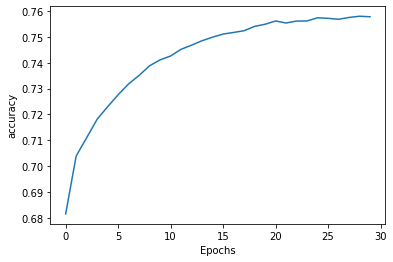

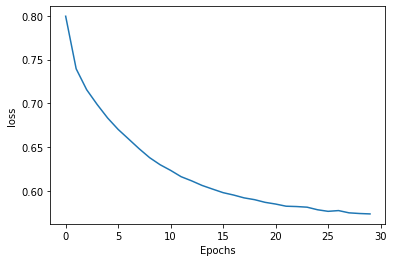

In [52]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [53]:
model2 = Sequential()
# more feature, add more densitiy of layers 
model2.add(Dense(1024, activation = 'relu', input_shape=(predictor.shape[1],)))
model2.add(Dense(512, activation = 'relu')) 
model2.add(Dense(256, activation = 'relu'))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))   
model2.add(Dense(5, activation = 'softmax'))

model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:

history2 = model2.fit(predictor, target,  epochs = 30, verbose = 1)

Epoch 1/30
190987/190987 [==============================] - 99s 520us/step - loss: 0.7964 - accuracy: 0.6833
Epoch 2/30
190987/190987 [==============================] - 105s 549us/step - loss: 0.7379 - accuracy: 0.7034
Epoch 3/30
190987/190987 [==============================] - 106s 555us/step - loss: 0.7142 - accuracy: 0.7117
Epoch 4/30
190987/190987 [==============================] - 106s 554us/step - loss: 0.6959 - accuracy: 0.7187
Epoch 5/30
190987/190987 [==============================] - 120s 630us/step - loss: 0.6809 - accuracy: 0.7242
Epoch 6/30
190987/190987 [==============================] - 2487s 13ms/step - loss: 0.6674 - accuracy: 0.7291
Epoch 7/30
190987/190987 [==============================] - 156s 816us/step - loss: 0.6558 - accuracy: 0.7335 - loss: 0.6558 - accuracy: 
Epoch 8/30
190987/190987 [==============================] - 154s 805us/step - loss: 0.6454 - accuracy: 0.7365
Epoch 9/30
190987/190987 [==============================] - 155s 810us/step - loss: 0.6370 - 

In [59]:
def plot_graphs2(history2, string):
    plt.plot(history2.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

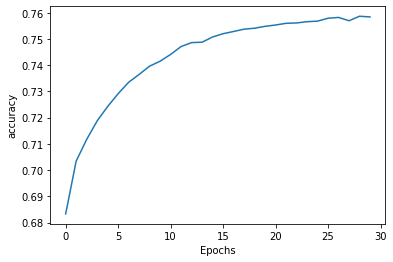

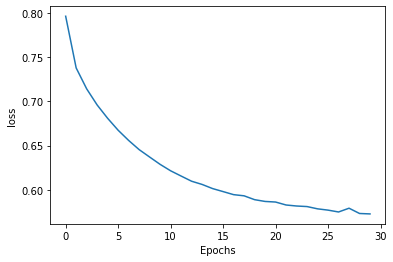

In [60]:
plot_graphs2(history2, 'accuracy')
plot_graphs2(history2, 'loss')